## Loan Prediction 

###  Akshay's Notebook

####  In this dataset we analyse the various aspects given then we perform data cleaning and make it a perfect one to create a model in it and we encode the all the categories to fit all the independent variables under the x variables. First we perform data visualization to find how data is distributed then under various libraries we create model, predict it and find the accuracy of how well the model has trained. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
path='C:/Users/Admin/Downloads/loan.csv'
data=pd.read_csv(path)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
data.shape

(614, 13)

In [5]:
data.isnull().values.any()

True

In [6]:
data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Text(0.5, 1.0, 'Type of Property')

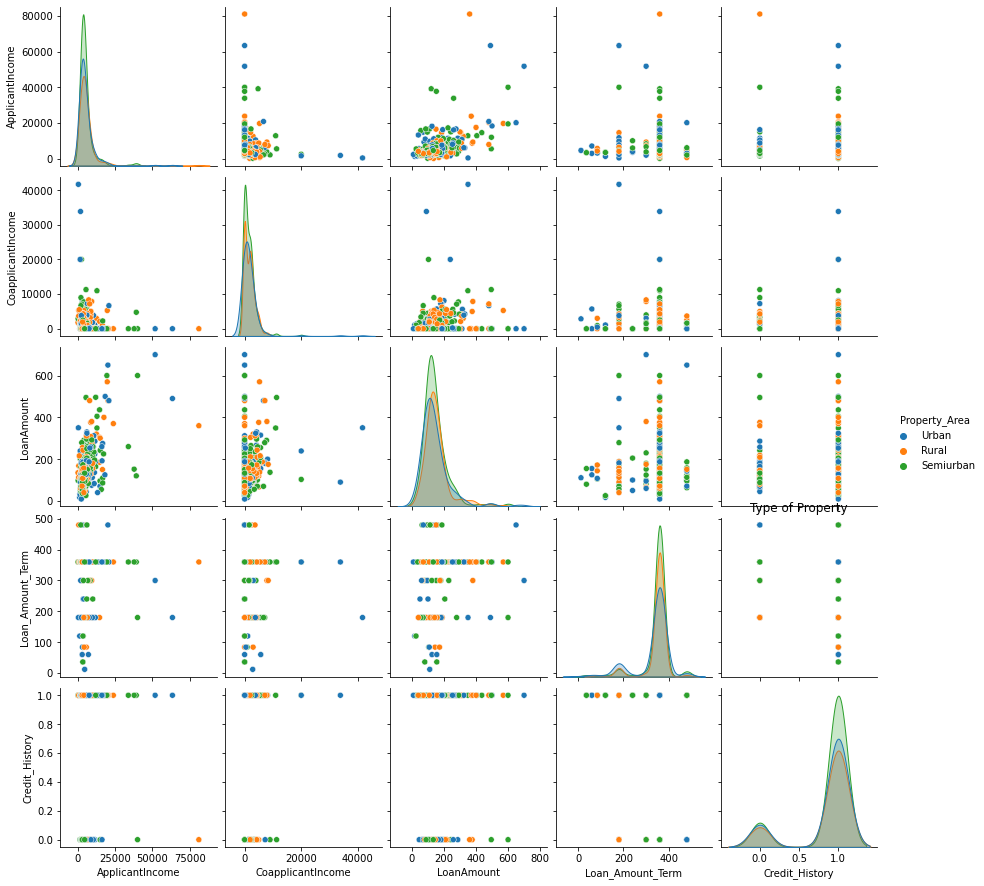

In [7]:
sns.pairplot(data,hue='Property_Area')
plt.title('Type of Property')

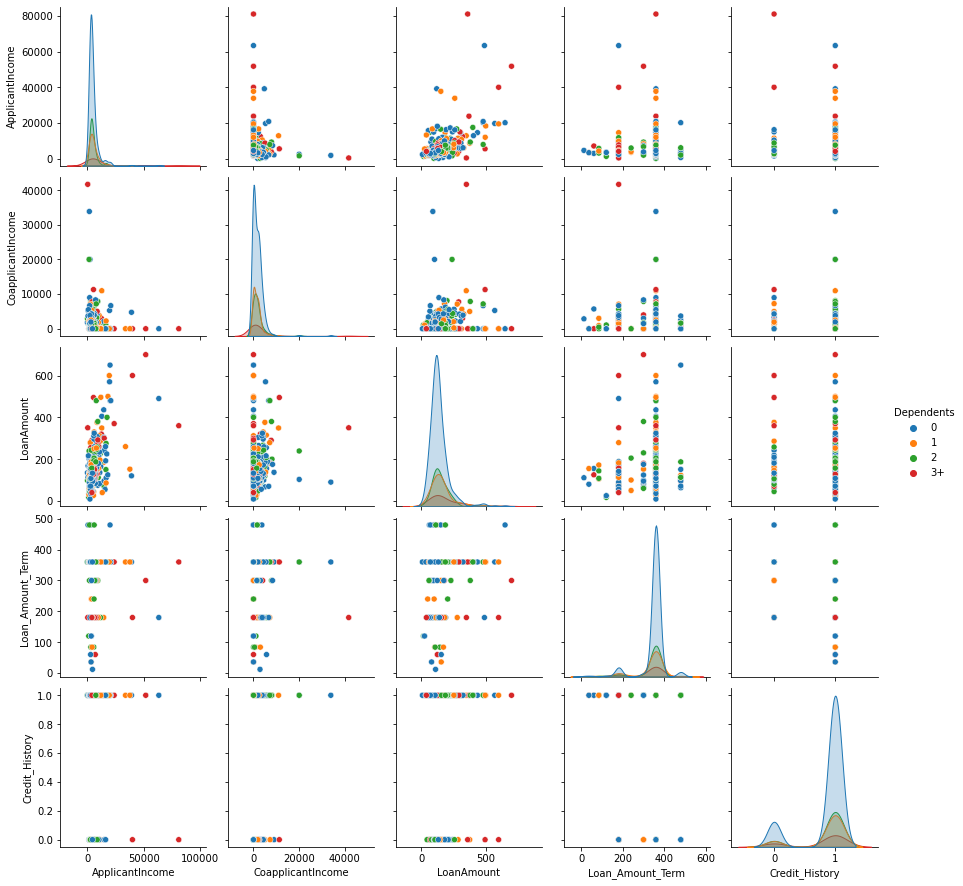

In [8]:
sns.pairplot(data,hue='Dependents')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Earnings of the Borrower')

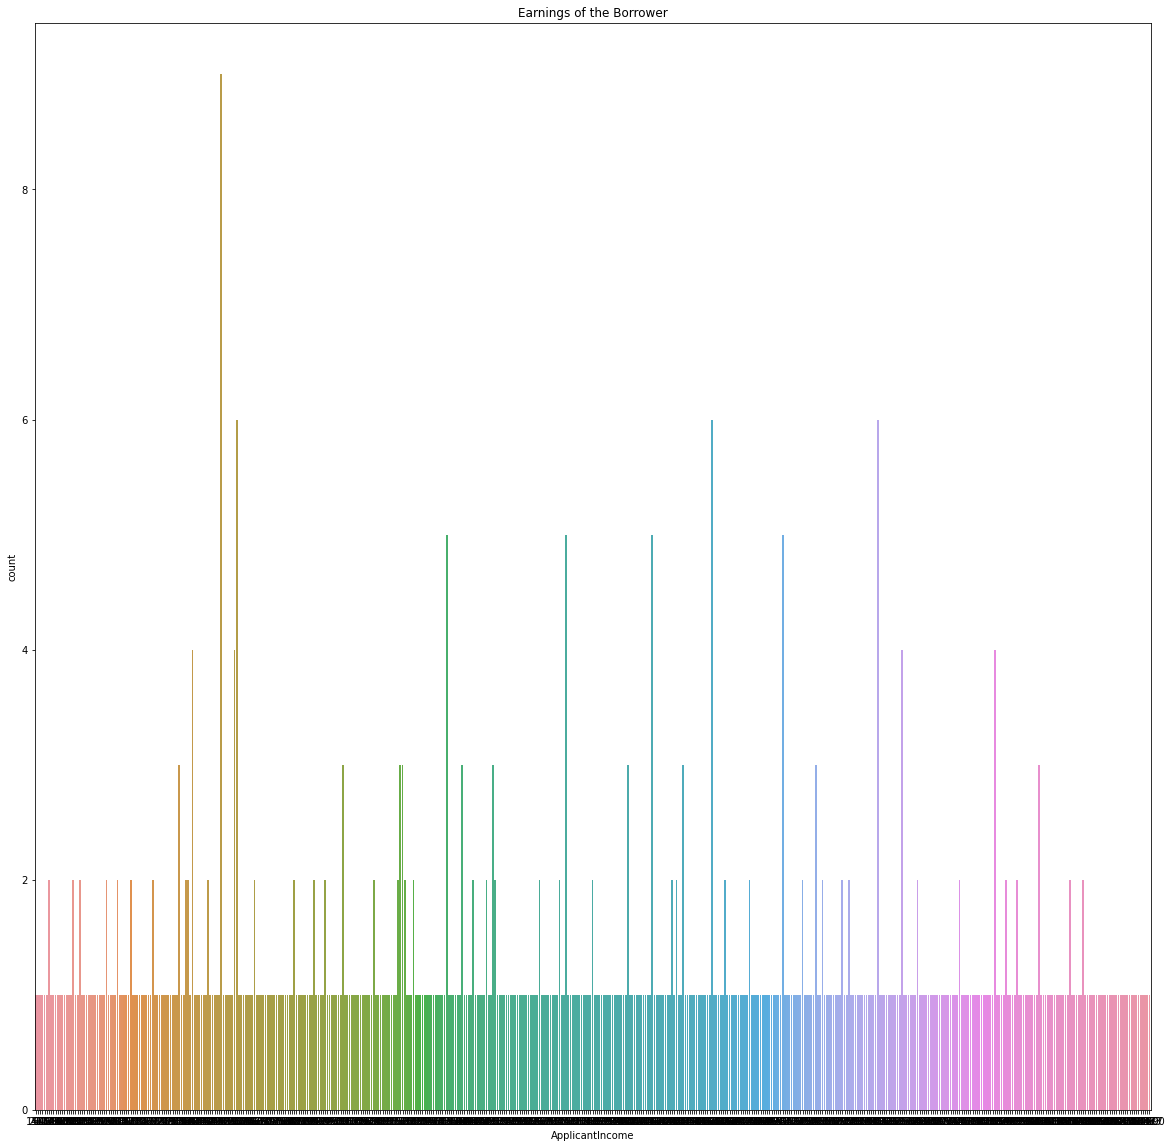

In [9]:
plt.figure(figsize=(20,20))
sns.countplot(data['ApplicantIncome'])
plt.title('Earnings of the Borrower')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

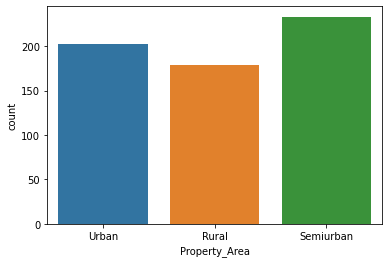

In [10]:
sns.countplot(data['Property_Area'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='count'>

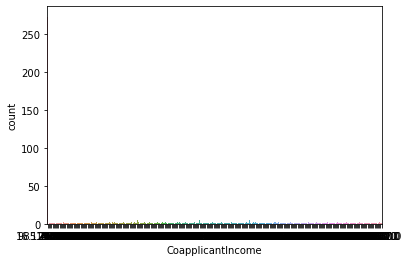

In [11]:
sns.countplot(data['CoapplicantIncome'])

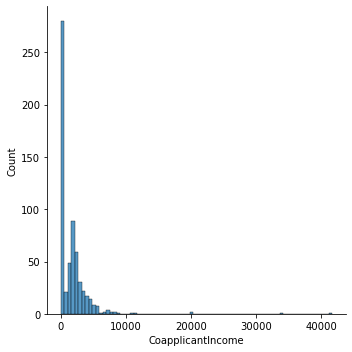

In [12]:
sns.displot(data['CoapplicantIncome'])

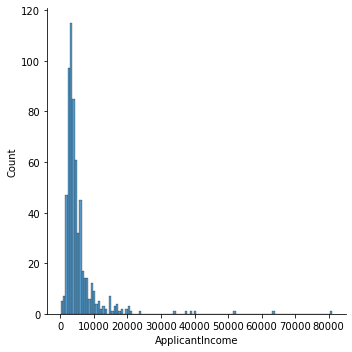

In [13]:
sns.displot(data['ApplicantIncome'])

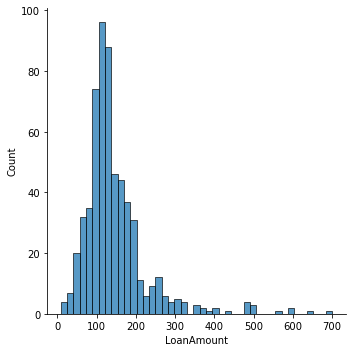

In [14]:
sns.displot(data['LoanAmount'])

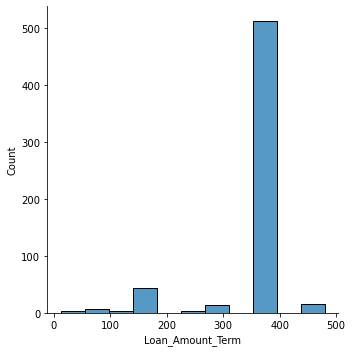

In [15]:
sns.displot(data['Loan_Amount_Term'])

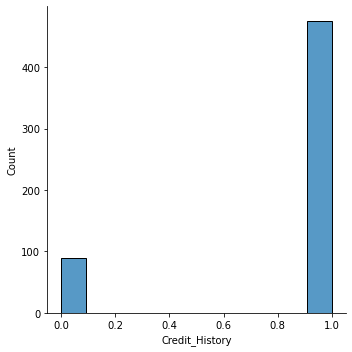

In [16]:
sns.displot(data['Credit_History'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

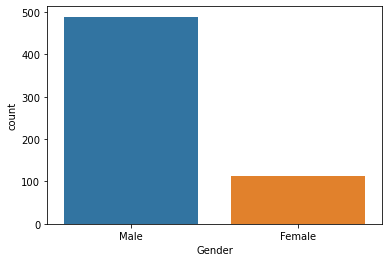

In [17]:
sns.countplot(data['Gender'])

In [18]:
data.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [19]:
data.drop('Loan_ID',axis=1,inplace=True)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [20]:
data['ApplicantIncome']=np.log(data['ApplicantIncome'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

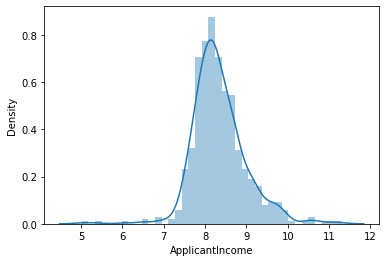

In [21]:
sns.distplot(data['ApplicantIncome'])

In [22]:
data['CoapplicantIncome'].value_counts()

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [23]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [24]:
data['Gender']=data.Gender.fillna('Male')

In [25]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [26]:
data['Married']=data.Married.fillna('Yes')

In [27]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [28]:
data['Dependents']=data.Dependents.fillna('0')

In [29]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [30]:
data['Self_Employed']=data.Self_Employed.fillna('No')

In [31]:
data['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [32]:
data['LoanAmount']=data.LoanAmount.fillna('120.0')

In [33]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [34]:
data['Loan_Amount_Term']=data.Loan_Amount_Term.fillna('360.0')

In [35]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [36]:
data['Credit_History']=data.Credit_History.fillna('1.0')

In [37]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.0,120.0,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,1508.0,128,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,0.0,66,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,2358.0,120,360,1,Urban,Y
4,Male,No,0,Graduate,No,8.699515,0.0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,7.972466,0.0,71,360,1,Rural,Y
610,Male,Yes,3+,Graduate,No,8.320205,0.0,40,180,1,Rural,Y
611,Male,Yes,1,Graduate,No,8.996157,240.0,253,360,1,Urban,Y
612,Male,Yes,2,Graduate,No,8.933664,0.0,187,360,1,Urban,Y


In [38]:
data.isnull().values.any()

False

In [39]:
data.apply(lambda x: sum(x.isnull()),axis=0)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
data.groupby(['Gender','Married','Dependents','ApplicantIncome','CoapplicantIncome','Credit_History','Loan_Amount_Term','LoanAmount','Loan_Status']).size()

Gender  Married  Dependents  ApplicantIncome  CoapplicantIncome  Credit_History  Loan_Amount_Term  LoanAmount  Loan_Status
Female  No       0           6.469250         3683.0             1.0             480.0             113.0       Y              1
                             7.313220         1800.0             0.0             360.0             103.0       N              1
                             7.501634         1666.0             1.0             360.0             54.0        Y              1
                             7.553287         2365.0             1.0             360.0             120.0       Y              1
                             7.582229         0.0                1.0             360.0             53.0        Y              1
                                                                                                                             ..
Male    Yes      3+          9.615805         0.0                1.0             360.0             300.0     

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

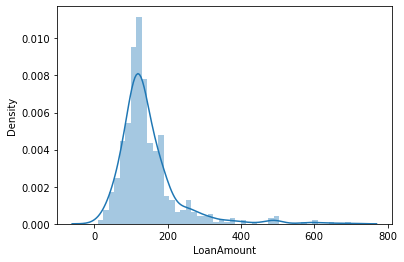

In [41]:
sns.distplot(data['LoanAmount'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

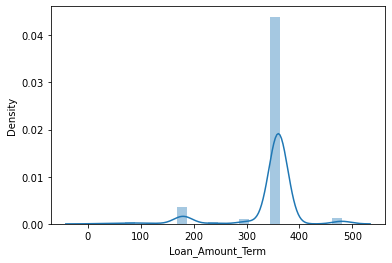

In [42]:
sns.distplot(data['Loan_Amount_Term'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

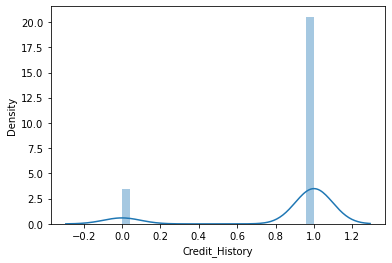

In [43]:
sns.distplot(data['Credit_History'])

<AxesSubplot:>

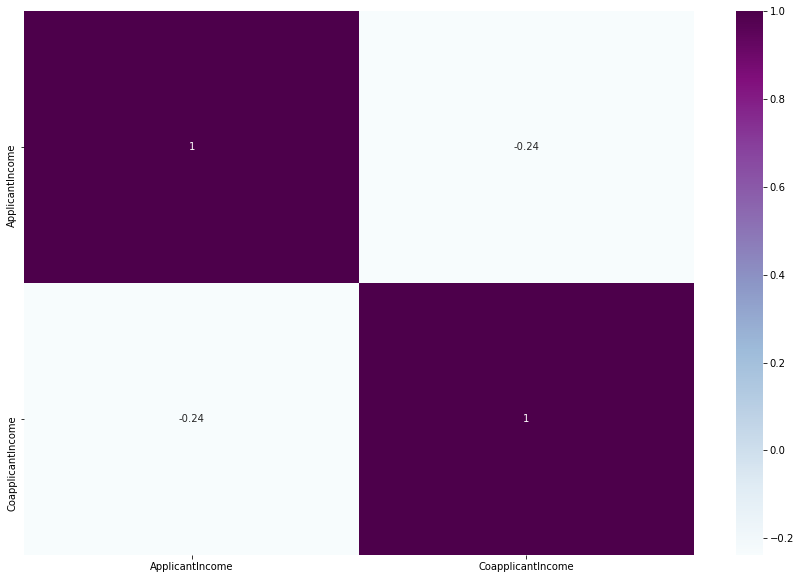

In [44]:
corr=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot = True,cmap="BuPu")

In [45]:
from sklearn import preprocessing as prep 
label_encoder= prep.LabelEncoder()
cols=["Gender","Married","Dependents","Education","Self_Employed","Loan_Status","Property_Area"]
for col in cols:
    data[col]=label_encoder.fit_transform(data[col])

In [46]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,0.0,120.0,360,1,2,1
1,1,1,1,0,0,8.430109,1508.0,128,360,1,0,0
2,1,1,0,0,1,8.006368,0.0,66,360,1,2,1
3,1,1,0,1,0,7.856707,2358.0,120,360,1,2,1
4,1,0,0,0,0,8.699515,0.0,141,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,0.0,71,360,1,0,1
610,1,1,3,0,0,8.320205,0.0,40,180,1,0,1
611,1,1,1,0,0,8.996157,240.0,253,360,1,2,1
612,1,1,2,0,0,8.933664,0.0,187,360,1,2,1


In [47]:
data.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount            object
Loan_Amount_Term      object
Credit_History        object
Property_Area          int32
Loan_Status            int32
dtype: object

In [48]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,0.0,120.0,360,1,2,1
1,1,1,1,0,0,8.430109,1508.0,128,360,1,0,0
2,1,1,0,0,1,8.006368,0.0,66,360,1,2,1
3,1,1,0,1,0,7.856707,2358.0,120,360,1,2,1
4,1,0,0,0,0,8.699515,0.0,141,360,1,2,1


In [49]:
x=data[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]
y=data[['Loan_Status']]

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=0)

In [51]:
from sklearn.tree import DecisionTreeClassifier as dt
model=dt(max_depth=50,random_state=0)
model.fit(x_train,y_train)
print(model)

DecisionTreeClassifier(max_depth=50, random_state=0)


In [52]:
predictions=model.predict(x_test)
predictions

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,

In [53]:
from sklearn import metrics
print('The accuracy of DecisionTreeClassifier is:',metrics.accuracy_score(predictions,y_test))

The accuracy of DecisionTreeClassifier is: 0.6971544715447154


[Text(154.44642857142856, 513.4, 'X[9] <= 0.5\ngini = 0.461\nsamples = 122\nvalue = [44, 78]'),
 Text(69.75, 453.0, 'X[7] <= 163.0\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(49.82142857142857, 392.6, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(89.67857142857142, 392.6, 'X[5] <= 8.559\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(69.75, 332.2, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(109.60714285714285, 332.2, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(239.1428571428571, 453.0, 'X[5] <= 7.306\ngini = 0.362\nsamples = 101\nvalue = [24, 77]'),
 Text(219.2142857142857, 392.6, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(259.07142857142856, 392.6, 'X[5] <= 8.371\ngini = 0.327\nsamples = 97\nvalue = [20, 77]'),
 Text(149.4642857142857, 332.2, 'X[4] <= 0.5\ngini = 0.215\nsamples = 57\nvalue = [7, 50]'),
 Text(99.64285714285714, 271.8, 'X[10] <= 0.5\ngini = 0.168\nsamples = 54\nvalue = [5, 49]'),
 Text(59.78571428571428, 211.39999999999998, 'X[7] <

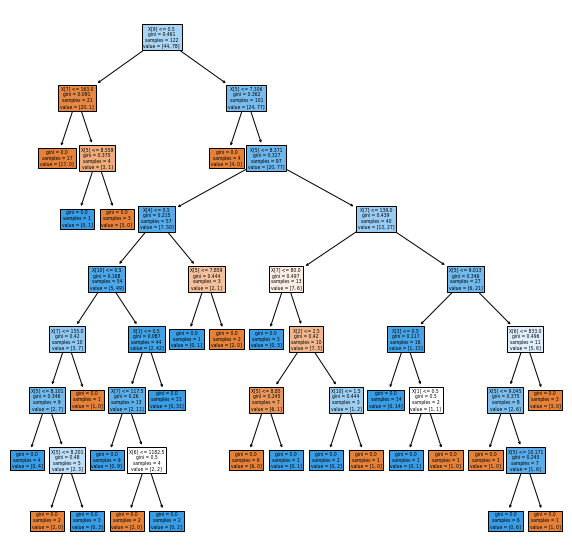

In [54]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(model,filled='True')

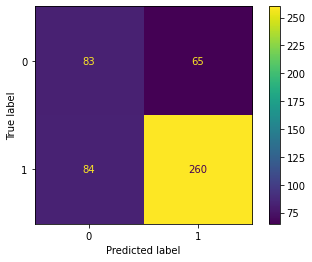

In [55]:
disp=(metrics.plot_confusion_matrix(model,x_test,y_test))

In [56]:
from sklearn.linear_model import LogisticRegression as lr
lr_model= lr(random_state=0).fit(x_train,y_train)
print(lr_model)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
lr_pred=lr_model.predict(x_test)
lr_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [58]:
print('The accuracy of the LogisticRegression is:',metrics.accuracy_score(lr_pred,y_test))

The accuracy of the LogisticRegression is: 0.8089430894308943


In [60]:
from sklearn.datasets import make_blobs
data=make_blobs(n_samples=614,n_features=13,cluster_std=7,random_state=100)

In [61]:
data

(array([[  3.87265775,   1.79905549,   2.81416454, ...,  -9.01180963,
          -4.99107965,  -9.47334495],
        [-13.7093188 , -13.20152894,  11.06643556, ...,   2.70002911,
         -11.19709214,   6.27535091],
        [-13.52778424, -10.06610923,   2.61586748, ...,   0.79435266,
          -2.33318859,  -4.73102936],
        ...,
        [ -5.50237194,  -7.16675317,  11.27102091, ...,  -4.77299753,
          -7.73855538,  -0.80099173],
        [ -8.02932678,  -0.81665901,   1.30551595, ...,   8.13554555,
          -0.27762392,  -5.75445684],
        [ -9.97880232,   4.05586602,   9.20856454, ...,  -4.08358446,
          -9.51927125,  -1.33024917]]),
 array([0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1,
        0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 0, 1, 2,
        0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 2, 2, 0, 1, 2,
        1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 2, 0, 0, 2, 2, 1, 2,
        1, 1, 1, 0, 2, 0, 0, 0, 1, 2, 0, 

In [62]:
data_feat=pd.DataFrame(data[0],columns=['feature_'+ str(i) for i in range(1,14)])
data_feat.head(4)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13
0,3.872658,1.799055,2.814165,-0.743725,-7.303617,-16.297353,14.913173,12.174301,-5.176442,5.257163,-9.011810,-4.991080,-9.473345
1,-13.709319,-13.201529,11.066436,-10.253810,-15.991204,7.088828,1.352093,-5.243650,5.456466,14.713175,2.700029,-11.197092,6.275351
2,-13.527784,-10.066109,2.615867,-10.992693,-0.454821,1.994437,-24.786236,-14.000678,-15.041578,-2.818284,0.794353,-2.333189,-4.731029
3,-4.928797,-14.106162,-3.737882,17.944120,-12.726580,-13.965235,0.959855,15.308548,-0.362030,1.250388,5.130503,-5.000126,-14.928014


In [63]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier(n_neighbors=16)
knn.fit(x_train,y_train)

<ipython-input-63-6bb8360db18e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=16)

In [64]:
predictione=knn.predict(x_test)
predictione

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,

In [65]:
from sklearn import metrics
print('The accuracy of the KNeighborsClassiFier is:',metrics.accuracy_score(predictione,y_test))

The accuracy of the KNeighborsClassiFier is: 0.6158536585365854


In [66]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,predictione))
print(classification_report(y_test,predictione))

[[ 35 113]
 [ 76 268]]
              precision    recall  f1-score   support

           0       0.32      0.24      0.27       148
           1       0.70      0.78      0.74       344

    accuracy                           0.62       492
   macro avg       0.51      0.51      0.50       492
weighted avg       0.59      0.62      0.60       492



In [68]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
print('svclassifier')

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


svclassifier


In [69]:
y_pred = svclassifier.predict(x_test)

In [70]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 75  73]
 [ 63 281]]
              precision    recall  f1-score   support

           0       0.54      0.51      0.52       148
           1       0.79      0.82      0.81       344

    accuracy                           0.72       492
   macro avg       0.67      0.66      0.66       492
weighted avg       0.72      0.72      0.72       492



In [72]:
from sklearn import metrics
print('The accuracy of the SVM Classifier is:',metrics.accuracy_score(y_pred,y_test))

The accuracy of the SVM Classifier is: 0.7235772357723578


In [73]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [74]:
modele = GaussianNB()
modele.fit(x_train,y_train)
print(modele)

GaussianNB()


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [75]:
predicts=modele.predict(x_test)
predicts

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predicts))
print(classification_report(y_test,predicts))

[[ 70  78]
 [ 28 316]]
              precision    recall  f1-score   support

           0       0.71      0.47      0.57       148
           1       0.80      0.92      0.86       344

    accuracy                           0.78       492
   macro avg       0.76      0.70      0.71       492
weighted avg       0.78      0.78      0.77       492



In [78]:
from sklearn import metrics
print('The accuracy of the GaussianNB is:',metrics.accuracy_score(predicts,y_test))

The accuracy of the GaussianNB is: 0.7845528455284553


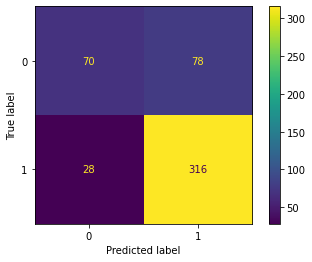

In [79]:
disp=(metrics.plot_confusion_matrix(modele,x_test,y_test))

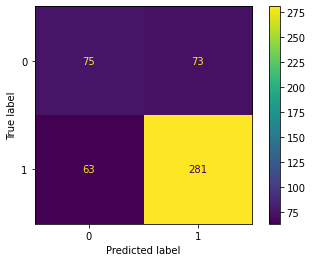

In [80]:
disp=(metrics.plot_confusion_matrix(svclassifier,x_test,y_test))

###  COMPLETED